In [1]:
import numpy as np
import sys
sys.path.append('./../')
from binary import *
from makePop_while import *
import matplotlib.pyplot as plt
from scipy.special import erf
import matplotlib as mpl

mpl.rcParams['hatch.linewidth'] = 0.3
plt.rc('text', usetex=True)
plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

./../binary.py:18: RuntimeWarning: divide by zero encountered in true_divide
  g_e = np.power(ref_eccs,12./19.)*np.power(1.+(121./304.)*ref_eccs**2.,870./2299.)/(1.-ref_eccs**2.)
./../binary.py:21: RuntimeWarning: invalid value encountered in multiply
  ref_F_integrand = np.power(g_e,4.)*np.power(1.-ref_eccs**2.,5./2.)/(ref_eccs*(1.+(121./304.)*ref_eccs**2.))
./../binary.py:21: RuntimeWarning: invalid value encountered in true_divide
  ref_F_integrand = np.power(g_e,4.)*np.power(1.-ref_eccs**2.,5./2.)/(ref_eccs*(1.+(121./304.)*ref_eccs**2.))
./../binary.py:24: RuntimeWarning: divide by zero encountered in true_divide
  ref_F *= (48./19.)/np.power(g_e,4.)
./../binary.py:24: RuntimeWarning: invalid value encountered in multiply
  ref_F *= (48./19.)/np.power(g_e,4.)
./../binary.py:27: RuntimeWarning: invalid value encountered in true_divide
  ref_F_lowEcc = np.power(ref_eccs,48./19.)/np.power(g_e,4.)


In [2]:
# Madau & Dickinson SFR at z=0
SFR = 1e-1 # Msun/yr/Mpc^3

# Convert to Msun/yr/Gpc^3
SFR *= 1e9

---
# Random Pairing

Assume a Salpeter IMF, normalized above 0.5 Msun:

$$
\frac{dP}{dm} = \frac{-(1+\lambda)}{(0.5\,M_\odot)^{1+\lambda}} m^\lambda
$$

with $\lambda=-2.35$.

If all stars are in binaries, then the SFR ($\frac{dM}{dtdV}$) is related to the binary number density $\frac{dN_b}{dtdV}$ by

$$
\begin{aligned}
\frac{dM}{dt\,dV} &= \int dm_1 \int dm_2 \frac{dN_b}{dt\,dV\,dm_1\,dm_2} (m_1+m_2) \\
&= \int dm_1 \int dm_2 \frac{dN_b}{dt\,dV} \frac{dP}{dm_1} \frac{dP}{dm_2} (m_1+m_2) \\
&= \frac{dN_b}{dt\,dV}  \int dm_1 \int dm_2 \frac{dP}{dm_1} \frac{dP}{dm_2} (m_1+m_2)
\end{aligned}
$$

So

$$
\frac{dN_b}{dt\,dV} = \frac{\frac{dM}{dt\,dV}}{\int dm_1 \int dm_2 \,p(m_1) p(m_2) (m_1+m_2)}
$$

Now, the number of binaries formed per component mass interval $dm_1$ and $dm_2$ is

$$
\begin{aligned}
\frac{dN_b}{dt\,dV\,dm_1\,dm_2} &= \frac{dN_b}{dt\,dV} p(m_1) p(m_2) \\
&= p(m_1) p(m_2) \,\frac{\frac{dM}{dt\,dV}}{\int dm_1' \int dm_2' \, p(m_1') p(m_2') (m_1'+m_2')}
\end{aligned}
$$

Hence the number density of binaries in which *both* components have "high" masses above some threshold is

$$
\begin{aligned}
\frac{dN}{dt\,dV}_{\mathrm{high}} &= \frac{dM}{dt\,dV} \frac{\int_\mathrm{high}dm_1' \int_\mathrm{high} dm_2' \, p(m_1') p(m_2')}{\int d m_1'' dm_2'' p(m_1'') p(m_2'') (m_1''+m_2'')} \\
&= \frac{dM}{dt\,dV} \frac{\left( \int_\mathrm{high}dm' \, p(m_1')\right)^2}{\int d m_1'' dm_2'' p(m_1'') p(m_2'') (m_1''+m_2'')}
\end{aligned}
$$

In [3]:
Ntot = 10000000
beta = 0

m1s = 0.5*np.power(1-np.random.random(Ntot),1./(1.-2.35))
qs = 0.9*np.random.random(Ntot)+0.1
m2s = qs*m1s

pHeavy = (np.where((m1s>20.) & (m2s>20.))[0].size)/Ntot
avgMass = np.mean(m1s+m2s)
print(avgMass,pHeavy)

rate_highMass = SFR/avgMass*pHeavy
net_efficiency = 20./rate_highMass
print(rate_highMass)
print(net_efficiency)
print(pHeavy/avgMass)

2.9616459594905082 0.0032112
108426.19421507163
0.00018445727201610039
0.0010842619421507162


In the common envelope paradigm, let's break this down into a few different factors:

$$
f = f_{\rm SN1} \times f_{\rm CE} \times f_{\rm SN2} \times f_{\rm Merge}
$$

Pieces are:
* $f_{\rm SN1}$: Fraction of binaries that avoid disruption in the primary's supernova
* $f_{\rm CE}$: Of those binaries that survive SN1, the fraction that successfully initiate CE and **do not** promptly merge
* $f_{\rm SN2}$: Of those binaries that survive CE, the fraction that avoid disruption in the secondary's supernova
* $f_{\rm Merge}$: Of those binaries that survive SN2, the fraction that merge via GW emission in under a Hubble time.

In [3]:
binaries,trials,numSN,numMerge,success = getPopRecursion(500,1.,0.3,0.2,10.*np.pi/180.,'maxwellian',[100,100])

In [6]:
fTot = 500./trials
fSN2 = numSN/trials
fMerge = fTot/fSN2
print(fSN2,fMerge,fTot,fSN2*fMerge)

NameError: name 'trials' is not defined

In [9]:
vs = np.logspace(2,np.log10(5000.),55)
fSN2s = np.zeros(vs.size)
fMerges = np.zeros(vs.size)

for i,v in enumerate(vs):
    
    binaries,trials,numSN,numMerge,success = getPopRecursion(1000,1.,0.3,0.2,10.*np.pi/180.,'maxwellian',[v,v],0.9,
                                                            efficiencyThreshold=1e-4)
    if success==False:
        print("!!!")
    
    fTot = binaries.size*1./trials
    fSN2 = numSN*1./trials
    fMerge = fTot/fSN2 
    
    fSN2s[i] = fSN2
    fMerges[i] = fMerge
    print(v,fSN2,fMerge,fTot,np.sqrt(fTot*(1-fTot)/trials))

100.0 0.7213333333333334 0.4634935304990757 0.3343333333333333 0.008613062861250452
107.51335328509221 0.6936666666666667 0.48246035559827005 0.33466666666666667 0.008615197596667741
115.59121134605059 0.6866666666666666 0.49271844660194175 0.3383333333333333 0.008638361898895894
124.27598742099694 0.63025 0.5140817136057121 0.324 0.007399729724794008
133.61328140447318 0.61825 0.5244642135058634 0.32425 0.007401215060718071
143.65211927219582 0.591 0.5528764805414552 0.32675 0.007415936176572719
154.4452104946379 0.57225 0.5364788117081695 0.307 0.007292993212666525
166.04922479100435 0.5395 0.5838739573679333 0.315 0.007344640903407055
178.52508967670957 0.50325 0.6060606060606061 0.305 0.0072796806248626045
191.93831036664844 0.47475 0.6045286993154291 0.287 0.007152464610188575
206.3593137139315 0.457 0.6214442013129102 0.284 0.007129936886116173
221.86381798995112 0.43625 0.6366762177650429 0.27775 0.007081753622867715
238.53323044733008 0.39925 0.6505948653725735 0.25975 0.006933

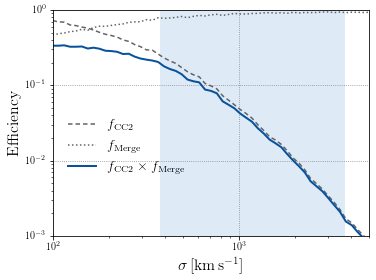

In [10]:
fig,ax = plt.subplots(figsize=(5.33,4))

ax.plot(vs,fSN2s,color='#636363',dashes=(3,2),label=r'$f_{\rm CC2}$',lw=1.5)
ax.plot(vs,fMerges,color='#636363',ls=':',label=r'$f_{\rm Merge}$',lw=1.5)
ax.plot(vs,fSN2s*fMerges,label=r'$f_{\rm CC2} \times f_{\rm Merge}$',lw=2,color='#08519c')

ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.grid(True,which='major',ls=':',color='grey')
ax.yaxis.grid(True,which='major',ls=':',color='grey')
ax.set_xlabel(r'$\sigma\,[\mathrm{km}\,\mathrm{s}^{-1}]$',fontsize=16)
ax.set_ylabel(r'Efficiency',fontsize=16)

maxwellian_samps = np.load('../output/processed_emcee_samples_maxwellian_beta0.9_perfectAlignment.npy')[()]
sigMaxwellian = 10.**maxwellian_samps[:,0]
lowKick = np.quantile(sigMaxwellian,0.05)
highKick = np.quantile(sigMaxwellian,0.95)
ax.fill_betweenx([1e-3,1],lowKick,highKick,zorder=-1,color='#deebf7')

ax.set_xlim(100,5e3)
ax.set_ylim(1e-3,1)
ax.legend(loc=(0.03,0.25),fontsize=14,frameon=False)

plt.tight_layout()
plt.savefig('efficiency.pdf',bbox_inches='tight')
plt.show()

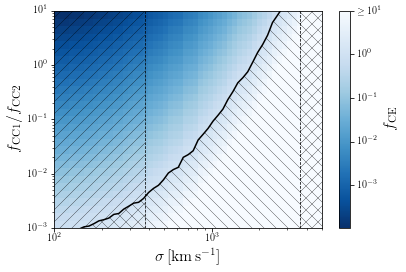

In [11]:
fCE_times_epsilon = net_efficiency/(fSN2s**2.*fMerges)

fig,ax = plt.subplots(figsize=(6,4))

eps = np.logspace(-3,1,30) # f1/f2

colors = np.log10(np.array([fCE_times_epsilon/e for e in eps]))
c = ax.pcolormesh(vs,eps,colors,cmap='Blues_r',vmax=1.)
ax.axvline(x=lowKick,ls='--',color='black',lw=0.75)
ax.axvline(x=highKick,ls='--',color='black',lw=0.75)

ax.fill_betweenx([1e-3,10],0,lowKick,facecolor="none",hatch='//',edgecolor='black',linewidth=0.0)
ax.fill_betweenx([1e-3,10],highKick,1e4,facecolor="none",hatch='//',edgecolor='black',linewidth=0.0)
ax.fill_between(vs,1e-3,fCE_times_epsilon,facecolor="none",hatch='\\\\',edgecolor='black',linewidth=0.0)

ax.plot(vs,fCE_times_epsilon,color='black')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\sigma\,[\mathrm{km}\,\mathrm{s}^{-1}]$',fontsize=16)
ax.set_ylabel(r'$f_\mathrm{CC1}/f_\mathrm{CC2}$',fontsize=16)
ax.set_xlim(1e2,5e3)
ax.set_ylim(1e-3,10)

cbar = fig.colorbar(c)
cbar.set_ticks([-3,-2,-1,0,1])
cbar.set_ticklabels(np.concatenate([["$10^{{{0}}}$".format(x) for x in [-3,-2,-1,0]],["$\geq 10^1$"]]))
cbar.set_label('$f_{\mathrm{CE}}$',fontsize=16)
plt.savefig('./CE_efficiency.pdf',bbox_inches='tight')
plt.show()

In [345]:
print(np.interp(sigmaUpperBound,vs,fCE))

19.841709893811675


In [13]:
sigmaLowerBound = lowKick
sigmaUpperBound = highKick

with open('efficiency-macros.txt','w') as outfile:
    
    outfile.write("\\newcommand{{\\fSNTwoupper}}{{{0:.2f}}}\n".format(np.interp(sigmaLowerBound,vs,fSN2s)))
    outfile.write("\\newcommand{{\\fSNTwolower}}{{{0:.3f}}}\n".format(np.interp(sigmaUpperBound,vs,fSN2s)))
    outfile.write("\\newcommand{{\\fMergelower}}{{{0:.2f}}}\n".format(np.interp(sigmaLowerBound,vs,fMerges)))
    outfile.write("\\newcommand{{\\fMergeupper}}{{{0:.2f}}}\n".format(np.interp(sigmaUpperBound,vs,fMerges)))
    outfile.write("\n")   
    
    efficiencyLimit = np.interp(1.,fCE_times_epsilon,vs)
    outfile.write("\\newcommand{{\\sigmaEfficiencyLimit}}{{{0:.1f}}}\n".format(efficiencyLimit))
    outfile.write("\\newcommand{{\\fMergeupperRestricted}}{{{0:.2f}}}\n".format(np.interp(efficiencyLimit,vs,fMerges)))
    outfile.write("\\newcommand{{\\fSNTwolowerRestricted}}{{{0:.2f}}}\n".format(np.interp(efficiencyLimit,vs,fSN2s)))
    
    outfile.write("\n")
    outfile.write("\\newcommand{{\\fCELowerLimit}}{{{0:.3f}}}\n".format(np.interp(sigmaLowerBound,vs,net_efficiency/(fSN2s**2*fMerges))))

21.940267259051993
245.10108385020888


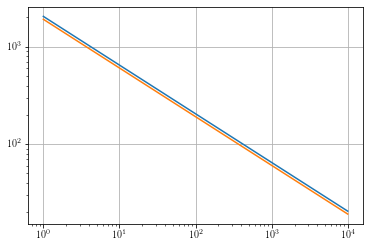

In [413]:
alpha = -2.2
beta = 1.3
Ntot = 100000
m1s = np.power(np.random.random(Ntot)*(75.**(1.+alpha)-5.**(1.+alpha))+5.**(1.+alpha),1./(1.+alpha))
m2s = np.power(np.random.random(Ntot)*(m1s**(1.+beta)-5.**(1.+beta))+5.*(1.+beta),1./(1.+beta))
Rs = 10.**(np.random.random(Ntot)*(np.log10(300.)-np.log10(5.))+np.log10(5.))*Rsun

mu = m1s*m2s/(m1s+m2s)

G = 6.67e-11
Rsun = 6.96e8
Msun = 2e30
mean_M = np.mean(m1s+m2s)*2e30
print(mean_M/Msun)
print(np.sqrt(G*np.mean(m1s+m2s)*Msun/(70.*Rsun))/1e3)

rs = np.logspace(0,4,1000)

fig,ax = plt.subplots()
ax.plot(rs,np.sqrt(G*mean_M/(rs*Rsun))/1e3)
ax.plot(rs,mean_sqrtM*np.sqrt(G/(rs*Rsun))/1e3)
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(True)
plt.show()

In [389]:
vx = np.random.normal(loc=0,scale=1,size=1000)
vy = np.random.normal(loc=0,scale=1,size=1000)
vz = np.random.normal(loc=0,scale=1,size=1000)
print(np.mean(np.sqrt(vx**2+vy**2+vz**2)))

1.6144174251433503


0.04808743631230315

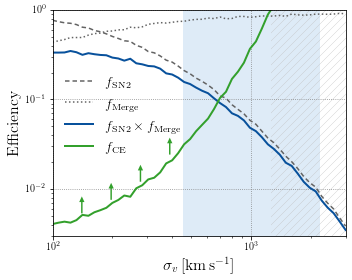

In [123]:
fig,ax = plt.subplots(figsize=(5,4))

ax.plot(vs,fSN2s,color='#636363',dashes=(3,2),label=r'$f_{\rm SN2}$',lw=1.5)
ax.plot(vs,fMerges,color='#636363',ls=':',label=r'$f_{\rm Merge}$',lw=1.5)
ax.plot(vs,fSN2s*fMerges,label=r'$f_{\rm SN2} \times f_{\rm Merge}$',lw=2,color='#08519c')

fCE = net_efficiency/(fSN2s**2.*fMerges)
ax.plot(vs,fCE,lw=2,color='#33a02c',label=r'$f_{\rm CE}$')
#ax.axvline(x=np.interp(1.,fCE,vs),color='grey')
ax.fill_betweenx([1e-3,1],np.interp(1.,fCE,vs),5e3,facecolor="none",hatch='///',edgecolor='#bdbdbd',linewidth=0.0)

ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.grid(True,which='major',ls=':',color='grey')
ax.yaxis.grid(True,which='major',ls=':',color='grey')
ax.set_xlabel(r'$\sigma_v\,[\mathrm{km}\,\mathrm{s}^{-1}]$',fontsize=16)
ax.set_ylabel(r'Efficiency',fontsize=16)
ax.fill_betweenx([1e-3,1],1010-555.,1010+1184,zorder=-1,color='#deebf7')
ax.set_xlim(100,3e3)
ax.set_ylim(3e-3,1)
ax.legend(loc=(0.025,0.34),fontsize=14,frameon=False)

hl=0.025
hw=0.018
aw=0.005
plt.arrow(0.1,0.1,0.0,0.05,head_length=hl,head_width=hw,width=aw,transform=ax.transAxes,color='#33a02c',linewidth=0)
plt.arrow(0.2,0.16,0.0,0.05,head_length=hl,head_width=hw,width=aw,transform=ax.transAxes,color='#33a02c',linewidth=0)
plt.arrow(0.3,0.24,0.0,0.05,head_length=hl,head_width=hw,width=aw,transform=ax.transAxes,color='#33a02c',linewidth=0)
plt.arrow(0.4,0.36,0.0,0.05,head_length=hl,head_width=hw,width=aw,transform=ax.transAxes,color='#33a02c',linewidth=0)

plt.tight_layout()
plt.savefig('efficiency.pdf',bbox_inches='tight')
plt.show()

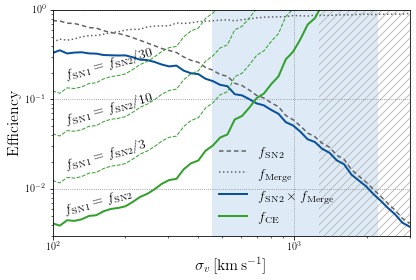

In [34]:
fig = plt.figure(figsize=(11,4))

ax = fig.add_subplot(121)
ax.plot(vs,fSN2s,color='#636363',dashes=(3,2),label=r'$f_{\rm SN2}$',lw=1.5)
ax.plot(vs,fMerges,color='#636363',ls=':',label=r'$f_{\rm Merge}$',lw=1.5)
ax.plot(vs,fSN2s*fMerges,label=r'$f_{\rm SN2} \times f_{\rm Merge}$',lw=2,color='#08519c')

fCE = net_efficiency/(fSN2s**2.*fMerges)
ax.plot(vs,fCE,lw=2,color='#33a02c',label=r'$f_{\rm CE}$')
ax.plot(vs,fCE*3,lw=1,color='#33a02c',ls='--')
ax.plot(vs,fCE*10,lw=1,color='#33a02c',ls='--')
ax.plot(vs,fCE*30,lw=1,color='#33a02c',ls='--')
#ax.axvline(x=np.interp(1.,fCE,vs),color='grey')
ax.fill_betweenx([1e-3,1],np.interp(1.,fCE,vs),5e3,facecolor="none",hatch='///',edgecolor='#bdbdbd',linewidth=0.0)

ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.grid(True,which='major',ls=':',color='grey')
ax.yaxis.grid(True,which='major',ls=':',color='grey')
ax.set_xlabel(r'$\sigma_v\,[\mathrm{km}\,\mathrm{s}^{-1}]$',fontsize=16)
ax.set_ylabel(r'Efficiency',fontsize=16)
ax.fill_betweenx([1e-3,1],1010-555.,1010+1184,zorder=-1,color='#deebf7')
ax.set_xlim(100,3e3)
ax.set_ylim(3e-3,1)
#ax.legend(loc=(0.025,0.34),fontsize=14,frameon=False)
ax.legend(loc=(0.45,0.03),fontsize=14,frameon=False)

ax.text(0.03,0.1,'$f_\mathrm{SN1} = f_\mathrm{SN2}$',transform=ax.transAxes,rotation=15.,fontsize=14)
ax.text(0.03,0.3,'$f_\mathrm{SN1} = f_\mathrm{SN2}/3$',transform=ax.transAxes,rotation=15.,fontsize=14)
ax.text(0.03,0.5,'$f_\mathrm{SN1} = f_\mathrm{SN2}/10$',transform=ax.transAxes,rotation=15.,fontsize=14)
ax.text(0.03,0.7,'$f_\mathrm{SN1} = f_\mathrm{SN2}/30$',transform=ax.transAxes,rotation=15.,fontsize=14)

plt.tight_layout()
plt.savefig('efficiency_alt.pdf',bbox_inches='tight')
plt.show()

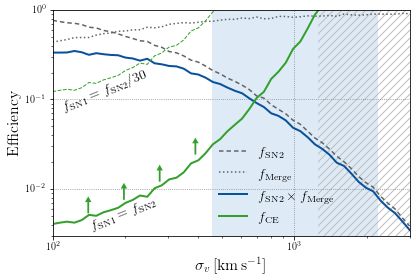

In [27]:
fig = plt.figure(figsize=(11,4))

ax = fig.add_subplot(121)
ax.plot(vs,fSN2s,color='#636363',dashes=(3,2),label=r'$f_{\rm SN2}$',lw=1.5)
ax.plot(vs,fMerges,color='#636363',ls=':',label=r'$f_{\rm Merge}$',lw=1.5)
ax.plot(vs,fSN2s*fMerges,label=r'$f_{\rm SN2} \times f_{\rm Merge}$',lw=2,color='#08519c')

fCE = net_efficiency/(fSN2s**2.*fMerges)
ax.plot(vs,fCE,lw=2,color='#33a02c',label=r'$f_{\rm CE}$')
ax.plot(vs,fCE*30,lw=1,color='#33a02c',ls='--')
#ax.axvline(x=np.interp(1.,fCE,vs),color='grey')
ax.fill_betweenx([1e-3,1],np.interp(1.,fCE,vs),5e3,facecolor="none",hatch='///',edgecolor='#bdbdbd',linewidth=0.0)

ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.grid(True,which='major',ls=':',color='grey')
ax.yaxis.grid(True,which='major',ls=':',color='grey')
ax.set_xlabel(r'$\sigma_v\,[\mathrm{km}\,\mathrm{s}^{-1}]$',fontsize=16)
ax.set_ylabel(r'Efficiency',fontsize=16)
ax.fill_betweenx([1e-3,1],1010-555.,1010+1184,zorder=-1,color='#deebf7')
ax.set_xlim(100,3e3)
ax.set_ylim(3e-3,1)
#ax.legend(loc=(0.025,0.34),fontsize=14,frameon=False)
ax.legend(loc=(0.45,0.03),fontsize=14,frameon=False)

ax.text(0.1,0.03,'$f_\mathrm{SN1} = f_\mathrm{SN2}$',transform=ax.transAxes,rotation=22.,fontsize=14)
ax.text(0.02,0.56,'$f_\mathrm{SN1} = f_\mathrm{SN2}/30$',transform=ax.transAxes,rotation=22.,fontsize=14)

hl=0.025
hw=0.018
aw=0.005
plt.arrow(0.1,0.1,0.0,0.05,head_length=hl,head_width=hw,width=aw,transform=ax.transAxes,color='#33a02c',linewidth=0)
plt.arrow(0.2,0.16,0.0,0.05,head_length=hl,head_width=hw,width=aw,transform=ax.transAxes,color='#33a02c',linewidth=0)
plt.arrow(0.3,0.24,0.0,0.05,head_length=hl,head_width=hw,width=aw,transform=ax.transAxes,color='#33a02c',linewidth=0)
plt.arrow(0.4,0.36,0.0,0.05,head_length=hl,head_width=hw,width=aw,transform=ax.transAxes,color='#33a02c',linewidth=0)



plt.tight_layout()
plt.show()

In [117]:
vMax = np.interp(1.,fCE,vs)
print(vMax)

1279.718159178304


In [118]:
print(np.interp(314.,vs,fCE))
print(np.interp(314.,vs,fSN2s),np.interp(vMax,vs,fSN2s))
print(np.interp(314.,vs,fMerges),np.interp(vMax,vs,fMerges))

0.01392907362472499
0.33574699128528174 0.0350281265496715
0.6668281616964749 0.8554466232672855


In [29]:
G = 6.67e-11
c = 2.998e8
Msun = 1.99e30
Rsun = 7e8

mMax = 75.
mMin = 5.
bq = 1.3
alpha = -2.2
n=3000

# Masses
m1 = np.power((mMax**(1.+alpha)-mMin**(1.+alpha))*np.random.random(n) + mMin**(1.+alpha),1./(1.+alpha))
m2 = np.power((m1**(1.+bq)-mMin**(1.+bq))*np.random.random(n)+mMin**(1.+bq),1./(1.+bq))

# Separation
sep = 10.**(np.log10(5.) + (np.log10(300)-np.log10(5.))*np.random.random(n))*Rsun

np.sqrt(2.*np.mean(G*(m1+m2)*Msun/(2.*sep)))

455265.1806320534

In [ ]:
fig = plt.figure(figsize=(11,4))

ax = fig.add_subplot(121)
ax.plot(vs,fSN2s,color='#636363',dashes=(3,2),label=r'$f_{\rm SN2}$',lw=1.5)
ax.plot(vs,fMerges,color='#636363',ls=':',label=r'$f_{\rm Merge}$',lw=1.5)
ax.plot(vs,fSN2s*fMerges,label=r'$f_{\rm SN2} \times f_{\rm Merge}$',lw=2,color='#08519c')

fCE = net_efficiency/(fSN2s**2.*fMerges)
ax.plot(vs,fCE,lw=2,color='#33a02c',label=r'$f_{\rm CE}$')
#ax.axvline(x=np.interp(1.,fCE,vs),color='grey')
ax.fill_betweenx([1e-3,1],np.interp(1.,fCE,vs),5e3,facecolor="none",hatch='///',edgecolor='#bdbdbd',linewidth=0.0)

ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.grid(True,which='major',ls=':',color='grey')
ax.yaxis.grid(True,which='major',ls=':',color='grey')
ax.set_xlabel(r'$\sigma_v\,[\mathrm{km}\,\mathrm{s}^{-1}]$',fontsize=16)
ax.set_ylabel(r'Efficiency',fontsize=16)
ax.fill_betweenx([1e-3,1],1010-555.,1010+1184,zorder=-1,color='#deebf7')
ax.set_xlim(100,3e3)
ax.set_ylim(3e-3,1)
ax.legend(loc=(0.03,0.3),fontsize=14,frameon=False)

eps=800.
pdfs = 0.4*vs**(-3.)*(-eps*np.exp(-eps**2./(2.*vs**2))*vs**2.+np.sqrt(np.pi/2.)*vs**3.*erf(eps/(np.sqrt(2.)*vs)))
ax.plot(vs,pdfs,ls='--')

plt.tight_layout()
plt.show()

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


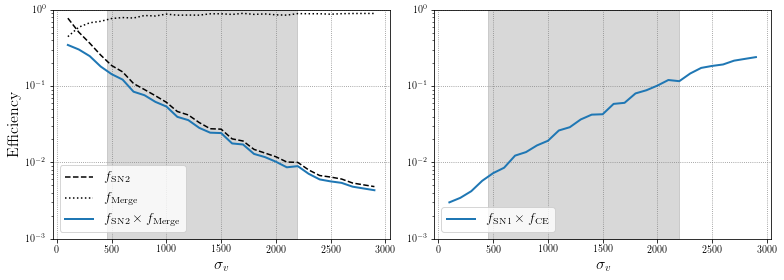

In [7]:
fig = plt.figure(figsize=(11,4))

ax = fig.add_subplot(121)
ax.plot(vs,fSN2s,color='black',ls='--',label=r'$f_{\rm SN2}$')
ax.plot(vs,fMerges,color='black',ls=':',label=r'$f_{\rm Merge}$')
ax.plot(vs,fSN2s*fMerges,label=r'$f_{\rm SN2} \times f_{\rm Merge}$',lw=2)
ax.set_yscale('log')
ax.xaxis.grid(True,which='major',ls=':',color='grey')
ax.yaxis.grid(True,which='major',ls=':',color='grey')
ax.set_xlabel(r'$\sigma_v$',fontsize=16)
ax.set_ylabel(r'Efficiency',fontsize=16)
ax.fill_betweenx([1e-3,1],1010-555.,1010+1184,zorder=-1,color='grey',alpha=0.3)
ax.set_ylim(1e-3,1)
ax.legend(loc='lower left',fontsize=14)

ax = fig.add_subplot(122)
ax.plot(vs,net_efficiency/(fSN2s*fMerges),label=r'$f_{\rm SN1} \times f_{\rm CE}$',lw=2)
ax.set_yscale('log')
ax.xaxis.grid(True,which='major',ls=':',color='grey')
ax.yaxis.grid(True,which='major',ls=':',color='grey')
ax.set_xlabel(r'$\sigma_v$',fontsize=16)
ax.fill_betweenx([1e-3,1],1010-555.,1010+1184,zorder=-1,color='grey',alpha=0.3)
ax.set_ylim(1e-3,1)
ax.legend(loc='lower left',fontsize=14)

plt.tight_layout()
plt.show()

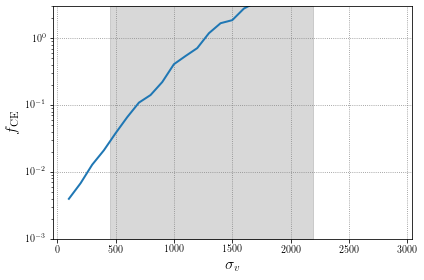

In [45]:
fig = plt.figure(figsize=(6,4))

ax = fig.add_subplot(111)
ax.plot(vs,net_efficiency/(fSN2s**2.*fMerges),lw=2)
ax.set_yscale('log')
ax.xaxis.grid(True,which='major',ls=':',color='grey')
ax.yaxis.grid(True,which='major',ls=':',color='grey')
ax.set_xlabel(r'$\sigma_v$',fontsize=16)
ax.set_ylabel(r'$f_{\rm CE}$',fontsize=16)
ax.fill_betweenx([1e-3,3],1010-555.,1010+1184,zorder=-1,color='grey',alpha=0.3)
ax.set_ylim(1e-3,3)

plt.tight_layout()
plt.show()